In [6]:
import matplotlib.image as mpimg
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as pl
from PIL import Image


# print(image.shape)

(100, 100)


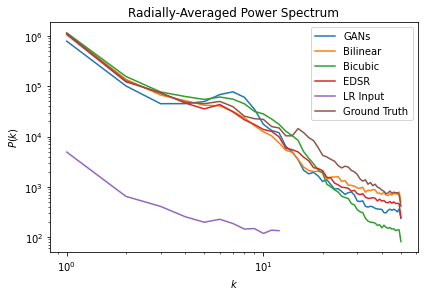

In [41]:
imgs = ['GANs.png', 'Bilinear.png', 'Bicubic.png', 'EDSR.png', 'LR Input.png', 'Ground Truth.png']
for i in imgs:
    img = Image.open(i).convert('L')
    img.save('greyscale.png')

    image = mpimg.imread("greyscale.png")
    npix = image.shape[0]

    fourier_image = np.fft.fftn(image)
    fourier_amplitudes = np.abs(fourier_image)**2

    kfreq = np.fft.fftfreq(npix) * npix
    kfreq2D = np.meshgrid(kfreq, kfreq)
    knrm = np.sqrt(kfreq2D[0]**2 + kfreq2D[1]**2)

    knrm = knrm.flatten()
    fourier_amplitudes = fourier_amplitudes.flatten()

    kbins = np.arange(0.5, npix//2+1, 1.)
    kvals = 0.5 * (kbins[1:] + kbins[:-1])
    Abins, _, _ = stats.binned_statistic(knrm, fourier_amplitudes,
                                        statistic = "mean",
                                        bins = kbins)
    Abins *= np.pi * (kbins[1:]**2 - kbins[:-1]**2)

    pl.loglog(kvals, Abins, label=i[0:-4])
    pl.xlabel("$k$")
    pl.ylabel("$P(k)$")
    pl.tight_layout()
    pl.legend()
    # pl.savefig("spectrum_"+i, dpi = 300, bbox_inches = "tight")
plt.title("Radially-Averaged Power Spectrum")
pl.show()

In [28]:
from matplotlib import cm, pyplot as plt
import numpy as np
import os
from pprint import pprint
from pysteps import io, rcparams
from pysteps.noise.fftgenerators import initialize_param_2d_fft_filter
from pysteps.noise.fftgenerators import initialize_nonparam_2d_fft_filter
from pysteps.noise.fftgenerators import generate_noise_2d_fft_filter
from pysteps.utils import conversion, rapsd, transformation
from pysteps.visualization import plot_precip_field, plot_spectrum1d

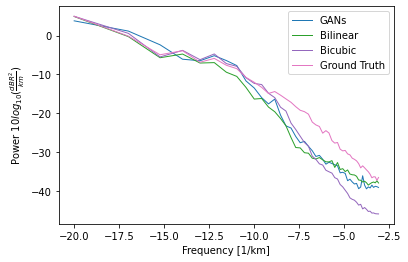

In [37]:
imgs = ['GANs.png', 'Bilinear.png', 'Bicubic.png', 'Ground Truth.png']
colors = {'GANs.png':'tab:blue', 'Bilinear.png':'tab:green', 'Bicubic.png':'tab:purple', 'Ground Truth.png':'tab:pink'}
for i in imgs:
    img = Image.open(i).convert('L')
    img.save('greyscale.png')

    R = mpimg.imread("greyscale.png")
    Fp = initialize_param_2d_fft_filter(R)

    # Compute the observed and fitted 1D PSD
    L = np.max(Fp["input_shape"])
    if L % 2 == 1:
        wn = np.arange(0, int(L / 2) + 1)
    else:
        wn = np.arange(0, int(L / 2))
    R_, freq = rapsd(R, fft_method=np.fft, return_freq=True)
    f = np.exp(Fp["model"](np.log(wn), *Fp["pars"]))

    # Extract the scaling break in km, beta1 and beta2
    w0 = L / np.exp(Fp["pars"][0])
    b1 = Fp["pars"][2]
    b2 = Fp["pars"][3]

    # Plot the observed power spectrum and the model
    # fig, ax = plt.subplots()
    # plot_scales = [512, 256, 128, 64, 32, 16, 8, 4]
    plot_spectrum1d(
        freq,
        R_,
        x_units="km",
        y_units="dBR",
        color=colors[i],
        label=i[0:-4],
    )
    plt.title("Radially-Averaged Power Spectrum")
    plt.legend()
plt.show()